<a href="https://colab.research.google.com/github/harpreetvirkk/NLP-QuestionAnswerSystem/blob/main/UIP_QnA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
!git clone -l -s https://github.com/harpreetvirkk/NLP-QuestionAnswerSystem rep
%cd rep
!ls

Cloning into 'rep'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 159 (delta 17), reused 153 (delta 17), pack-reused 0
Receiving objects: 100% (159/159), 1.52 MiB | 22.56 MiB/s, done.
Resolving deltas: 100% (17/17), done.
/content/rep
dataset  README.md  UIP_QnA.ipynb


In [2]:
!ls dataset

S08_question_answer_pairs.txt  S10_question_answer_pairs.txt  text_data_toc.csv
S09_question_answer_pairs.txt  text_data


In [3]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('wordnet')
import unicodedata

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
df1 = pd.read_csv('./dataset/S08_question_answer_pairs.txt', sep='\t')
df2 = pd.read_csv('./dataset/S09_question_answer_pairs.txt', sep='\t')
df3 = pd.read_csv('./dataset/S10_question_answer_pairs.txt', sep='\t', encoding = 'ISO-8859-1')

In [5]:
df3

,ArticleTitle,Question,Answer,DifficultyFromQuestioner,DifficultyFromAnswerer,ArticleFile
0,Alessandro_Volta,Was Alessandro Volta a professor of chemistry?,Alessandro Volta was not a professor of chemis...,easy,easy,S10_set4_a10
1,Alessandro_Volta,Was Alessandro Volta a professor of chemistry?,No,easy,hard,S10_set4_a10
2,Alessandro_Volta,Did Alessandro Volta invent the remotely opera...,Alessandro Volta did invent the remotely opera...,easy,easy,S10_set4_a10
3,Alessandro_Volta,Did Alessandro Volta invent the remotely opera...,Yes,easy,easy,S10_set4_a10
4,Alessandro_Volta,Was Alessandro Volta taught in public schools?,Volta was taught in public schools.,easy,easy,S10_set4_a10
...,...,...,...,...,...,...
1453,Zebra,What areas do the Grevy's Zebras inhabit?,NaN,hard,NaN,S10_set1_a9
1454,Zebra,Which species of zebra is known as the common ...,"Plains Zebra (Equus quagga, formerly Equus bur...",hard,medium,S10_set1_a9
1455,Zebra,Which species of zebra is known as the common ...,Plains Zebra,hard,medium,S10_set1_a9
1456,Zebra,At what age can a zebra breed?,five or six,hard,medium,S10_set1_a9


In [6]:
frames = [df1, df2, df3]
df = pd.concat(frames)
df

,ArticleTitle,Question,Answer,DifficultyFromQuestioner,DifficultyFromAnswerer,ArticleFile
0,Abraham_Lincoln,Was Abraham Lincoln the sixteenth President of...,yes,easy,easy,S08_set3_a4
1,Abraham_Lincoln,Was Abraham Lincoln the sixteenth President of...,Yes.,easy,easy,S08_set3_a4
2,Abraham_Lincoln,Did Lincoln sign the National Banking Act of 1...,yes,easy,medium,S08_set3_a4
3,Abraham_Lincoln,Did Lincoln sign the National Banking Act of 1...,Yes.,easy,easy,S08_set3_a4
4,Abraham_Lincoln,Did his mother die of pneumonia?,no,easy,medium,S08_set3_a4
...,...,...,...,...,...,...
1453,Zebra,What areas do the Grevy's Zebras inhabit?,NaN,hard,NaN,S10_set1_a9
1454,Zebra,Which species of zebra is known as the common ...,"Plains Zebra (Equus quagga, formerly Equus bur...",hard,medium,S10_set1_a9
1455,Zebra,Which species of zebra is known as the common ...,Plains Zebra,hard,medium,S10_set1_a9
1456,Zebra,At what age can a zebra breed?,five or six,hard,medium,S10_set1_a9


In [7]:
def getArticleText(file):
  fpath = './dataset/text_data/'+file+'.txt.clean'
  try:
    f = open(fpath, 'r')
    text = f.read()
  except UnicodeDecodeError:
    f = open(fpath, 'r', encoding = 'ISO-8859-1')
    text = f.read()
  return text

In [8]:
df = df.dropna(subset=['ArticleFile'])
df['ArticleText'] = df['ArticleFile'].apply(lambda x: getArticleText(x))
df['ArticleText'] = df['ArticleText'].apply(lambda x: re.sub(r'(\n)+', '. ', x))
df = df.drop(['DifficultyFromQuestioner', 'DifficultyFromAnswerer', 'ArticleFile'], axis='columns')
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ArticleTitle,Question,Answer,ArticleText
0,Abraham_Lincoln,Was Abraham Lincoln the sixteenth President of...,yes,"Abraham Lincoln. Abraham Lincoln (February 12,..."
1,Abraham_Lincoln,Was Abraham Lincoln the sixteenth President of...,Yes.,"Abraham Lincoln. Abraham Lincoln (February 12,..."
2,Abraham_Lincoln,Did Lincoln sign the National Banking Act of 1...,yes,"Abraham Lincoln. Abraham Lincoln (February 12,..."
3,Abraham_Lincoln,Did Lincoln sign the National Banking Act of 1...,Yes.,"Abraham Lincoln. Abraham Lincoln (February 12,..."
4,Abraham_Lincoln,Did his mother die of pneumonia?,no,"Abraham Lincoln. Abraham Lincoln (February 12,..."
...,...,...,...,...
1453,Zebra,What areas do the Grevy's Zebras inhabit?,NaN,Zebra. Plains zebra. Grevy's zebra. Zebras are...
1454,Zebra,Which species of zebra is known as the common ...,"Plains Zebra (Equus quagga, formerly Equus bur...",Zebra. Plains zebra. Grevy's zebra. Zebras are...
1455,Zebra,Which species of zebra is known as the common ...,Plains Zebra,Zebra. Plains zebra. Grevy's zebra. Zebras are...
1456,Zebra,At what age can a zebra breed?,five or six,Zebra. Plains zebra. Grevy's zebra. Zebras are...


In [9]:
def cleanQuestion(text):
  text = str(text)
  wnl = nltk.stem.WordNetLemmatizer()
  text = text.lower()
  words = re.sub(r'[^\w\s]', '', text).split()
  return " ".join([word for word in words])

def cleanAnswer(text):
  text = str(text)
  wnl = nltk.stem.WordNetLemmatizer()
  text = text.lower()
  words = re.sub(r'[^\w\s]', '', text).split()
  return " ".join([word for word in words])

def cleanText(text):
  text = str(text)
  wnl = nltk.stem.WordNetLemmatizer()
  text = text.lower()
  words = re.sub(r'[^\w\s\.\?]', '', text).split()
  return " ".join([word for word in words])

In [10]:
df['Question'] = df['Question'].apply(lambda x: cleanQuestion(x))
df['Answer'] = df['Answer'].apply(lambda x: cleanAnswer(x))
df['ArticleText'] = df['ArticleText'].apply(lambda x: cleanText(x))

In [11]:
df

,ArticleTitle,Question,Answer,ArticleText
0,Abraham_Lincoln,was abraham lincoln the sixteenth president of...,yes,abraham lincoln. abraham lincoln february 12 1...
1,Abraham_Lincoln,was abraham lincoln the sixteenth president of...,yes,abraham lincoln. abraham lincoln february 12 1...
2,Abraham_Lincoln,did lincoln sign the national banking act of 1863,yes,abraham lincoln. abraham lincoln february 12 1...
3,Abraham_Lincoln,did lincoln sign the national banking act of 1863,yes,abraham lincoln. abraham lincoln february 12 1...
4,Abraham_Lincoln,did his mother die of pneumonia,no,abraham lincoln. abraham lincoln february 12 1...
...,...,...,...,...
1453,Zebra,what areas do the grevys zebras inhabit,nan,zebra. plains zebra. grevys zebra. zebras are ...
1454,Zebra,which species of zebra is known as the common ...,plains zebra equus quagga formerly equus burch...,zebra. plains zebra. grevys zebra. zebras are ...
1455,Zebra,which species of zebra is known as the common ...,plains zebra,zebra. plains zebra. grevys zebra. zebras are ...
1456,Zebra,at what age can a zebra breed,five or six,zebra. plains zebra. grevys zebra. zebras are ...


In [12]:
df.to_pickle('./dataset-clean-2.pkl')
# df = pd.read_pickle('./dataset.pkl')
# df

In [ ]:
use_cuda = True

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
!pip3 install transformers
!pip3 install torch

     |████████████████████████████████| 1.3MB 6.4MB/s 
     |████████████████████████████████| 1.1MB 53.6MB/s 
     |████████████████████████████████| 2.9MB 47.9MB/s 
     |████████████████████████████████| 890kB 58.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=f8e121536c206c77c2f1e480ac3cdf41fbfe59500a4d3e7014aeb93ee2f68fbc
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import torch

In [ ]:
from transformers import BertForQuestionAnswering

model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [ ]:
print(tokenizer.sep_token_id)

102


In [ ]:
def print_score_graph(start_scores, end_scores, tokens):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Pull the scores out of PyTorch Tensors and convert them to 1D numpy arrays.
    s_scores = start_scores.detach().numpy().flatten()
    e_scores = end_scores.detach().numpy().flatten()

    # We'll use the tokens as the x-axis labels. In order to do that, they all need
    # to be unique, so we'll add the token index to the end of each one.
    token_labels = []
    for (i, token) in enumerate(tokens):
        token_labels.append('{:} - {:>2}'.format(token, i))


    # Use plot styling from seaborn.
    sns.set(style='darkgrid')

    # Increase the plot size and font size.
    #sns.set(font_scale=1.5)
    plt.rcParams["figure.figsize"] = (24,8)
    
    # Create a barplot showing the start word score for all of the tokens.
    ax = sns.barplot(x=token_labels, y=s_scores, ci=None)

    # Turn the xlabels vertical.
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

    # Turn on the vertical grid to help align words to scores.
    ax.grid(True)

    plt.title('Start Word Scores')

    plt.show()

In [ ]:
def stock_chat_bot(question, passage):
    # ====Tokenize====
    # Apply tokenizer to input text and treat them as a pair
    input_ids = tokenizer.encode(question, passage)
    
    # Printing the length of sequence
    print('Query has {} tokens.'.format(len(input_ids)))
    
    # ====Set Segment IDs====
    # Search for the first instance of segment ID
    sep_index = input_ids.index(tokenizer.sep_token_id)
    
    # Segment A token : The Question
    num_seg_a = sep_index+1
    
    # Segment B token : The Answer
    num_seg_b = len(input_ids) - num_seg_a
    
    # Constructing list of 0s and 1s
    # 0s of Segment A and 1s for Segment B
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    
    # There should be a segment id for every input token
    assert len(segment_ids) == len(input_ids)
    
    start_scores, end_scores = model(torch.tensor([input_ids]), # input text token
                                    token_type_ids = torch.tensor([segment_ids])) # differentiates between question and answer text
    
    # ==== Reconstruct Answer ====
    # print the answer with max start and end scores
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores)
    
    # Get the string version of input tokens
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    
    answer = tokens[answer_start]
    
    for i in range(answer_start+1, answer_end+1):
        if tokens[i][0:2] == '##':
            answer += tokens[i][2:]
        else:
            answer += ' '+tokens[i]
    
    print_score_graph(start_scores, end_scores, tokens)
    
    print('Answer : ', answer)

In [ ]:
import textwrap

# Wrap text to 80 characters.
wrapper = textwrap.TextWrapper(width=80) 

# sample report taken from economic times on corona virus
# https://economictimes.indiatimes.com/markets/coronavirus-impact-on-stock-market

bert_abstract = "The coronavirus outbreak, which was first detected in China, has infected people in 185 countries. Its spread has left businesses around the world counting the costs.Here is a selection of maps and charts to help you understand the economic impact of the virus so far.Global shares take a hit. Big shifts in stock markets, where shares in companies are bought and sold, can affect the value of pensions or individual savings accounts (ISAs). The FTSE, Dow Jones Industrial Average and the Nikkei have all seen huge falls since the outbreak began on 31 December. The Dow and the FTSE saw their biggest quarterly drops in the first three months of the year since 1987 due to corona pandemic. Investors fear the spread of the coronavirus will destroy economic growth and that government action may not be enough to stop the decline.In response, central banks in many countries, including the United Kingdom, slashed interest rates due to corona pandemic.That should, in theory, make borrowing cheaper and encourage spending to boost the economy."
print(wrapper.fill(bert_abstract))

The coronavirus outbreak, which was first detected in China, has infected people
in 185 countries. Its spread has left businesses around the world counting the
costs.Here is a selection of maps and charts to help you understand the economic
impact of the virus so far.Global shares take a hit. Big shifts in stock
markets, where shares in companies are bought and sold, can affect the value of
pensions or individual savings accounts (ISAs). The FTSE, Dow Jones Industrial
Average and the Nikkei have all seen huge falls since the outbreak began on 31
December. The Dow and the FTSE saw their biggest quarterly drops in the first
three months of the year since 1987 due to corona pandemic. Investors fear the
spread of the coronavirus will destroy economic growth and that government
action may not be enough to stop the decline.In response, central banks in many
countries, including the United Kingdom, slashed interest rates due to corona
pandemic.That should, in theory, make borrowing cheaper an

Query has 394 tokens.


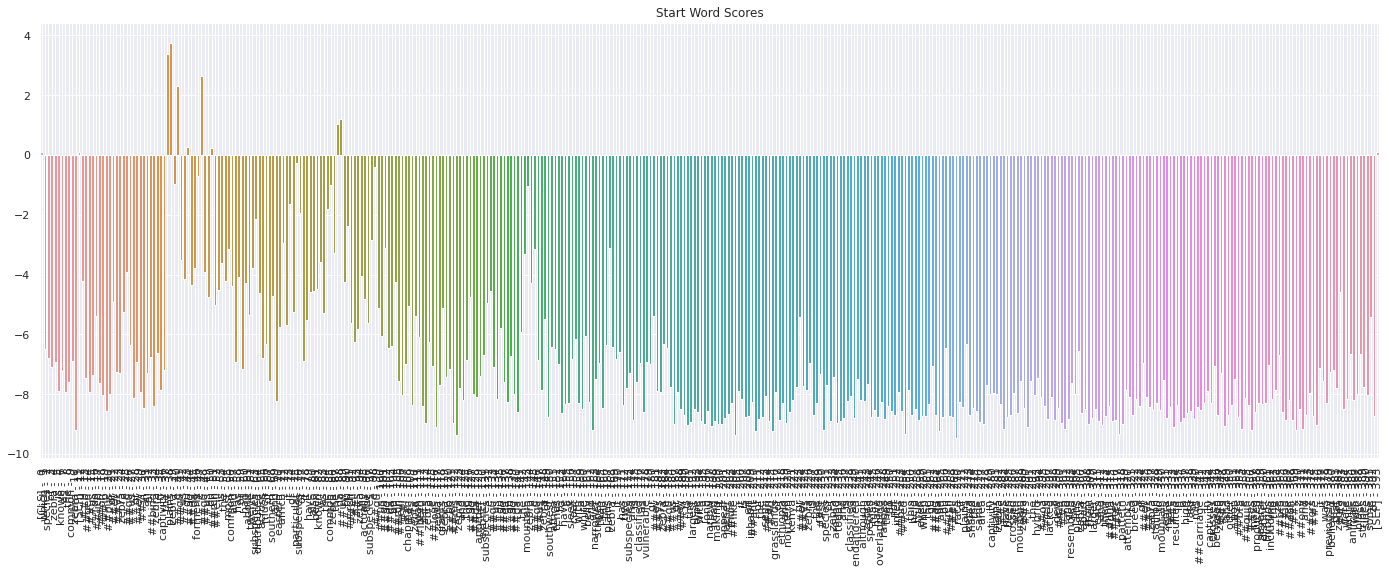

Answer :  plains zebra equus quagga


In [ ]:
question = "What is the impact of coronavirus on Dow Jones Industrial Average?"

stock_chat_bot(df['Question'].iloc[3993], df['ArticleText'].iloc[3993][3300:5000])
# stock_chat_bot(question, bert_abstract)

In [ ]:
# df['ArticleText'].iloc[0]

In [ ]:
df['Question'].iloc[3993]

'which species of zebra is known as the common zebra'

In [ ]:
dfn['ArticleText'].iloc[36][3000:5000]

'finition of republicanism. as diggins explains lincoln presented americans a theory of history that offers a profound contribution to the theory and destiny of republicanism itself. john patrick diggins the lost soul of american politics virtue selfinterest and the foundations of liberalism 1986 p. 307. foner 1970 p. 215 noted that lincoln stressed the moral basis of republicanism. jaffa 2000 p. 399 stresses lincolns emphasis on the declaration of independence as what lincoln called the sheet anchor of republicanism. see also mcpherson 1992 pp.6164. abraham lincoln was born on february 12 1809 to thomas lincoln and nancy hanks two uneducated farmers. lincoln was born in a oneroom log cabin on the sinking spring farm in southeast hardin county kentucky now part of larue county. this area was at the time considered the frontier. the name abraham was chosen to commemorate his grandfather who was killed in an american indian raid in 1786. donald 1995 p 21 his elder sister sarah lincoln wa

In [ ]:
df['Answer'].isnan

AttributeError: ignored